# TiNNy - Classification Demo

Welcome to the TiNNy Classification Demo! In this interactive demonstration, we'll be exploring the classification capabilities of TiNNy using two distinct datasets: the famous MNIST dataset, which consists of images of handwritten digits from 0 to 9, and the insightful Heart Attack Analysis & Prediction Dataset.

AstroDave, Will Cukierski. (2012). Digit Recognizer. Kaggle. https://kaggle.com/competitions/digit-recognizer

Rashik Rahman. (2021). Heart Attack Analysis & Prediction Dataset. Kaggle. https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [22]:
# Import modules
import tinny
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
warnings.filterwarnings('ignore')

## Dataset 1 - MNIST Handwritten Digits

### Data loading and preparation

In order for TiNNy to work, both X and Y must be numpy arrays and have the following shape: `(NUMBER_SAMPLES, NUMBER_FEATURES)`. Y can also just be a vector `(NUMBER_SAMPLES,)`

In [23]:
# Read CSVs
data_train = np.array(pd.read_csv('./data/classification/MNISTDigits/train.csv')).T

# Extract features and labels
m, n = data_train.shape

X_train = data_train[1:n].T
y_train = data_train[0]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=35000, random_state=42)

# Min-Max normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape, y_train.shape)

(35000, 784) (35000,)


### Creating a TiNNy Network

Building a TiNNy network involves defining its architecture by specifying the layers that make it up. Here’s how you can effortlessly construct your network:

1. Layer Specifications: Each layer within the network requires three key pieces of information:
    - The number of inputs it will receive. In the case of the first layer, this will be the number of features.
    - The number of neurons (or units) it contains.
    - The activation function to apply to its outputs.

2. Layer Types: Our network can incorporate both Dense layers and an Output layer. For this demonstration:
    - Dense Layers: We will utilize the ReLU (Rectified Linear Unit) activation function, configuring these layers with 20 neurons each.
    - Output Layer: Given the multi-class classification nature of our problem, the softmax activation function is employed to handle the output layer effectively.

3. Network Configuration: To finalize the TiNNy network setup, we specify:
    - The type of problem we are addressing (either regression or classification).
    - The loss function to optimize during training.
    - The layers that constitute the network architecture.

In [24]:
# Network creation
l1 = tinny.DenseLayer(784, 20, "ReLU")
l2 = tinny.DenseLayer(20, 20, "ReLU")
l3 = tinny.OutputLayer(20, 10, "softmax")
nn = tinny.TiNNyNetwork(problem_type="classification", loss_function="crossentropy", layers=[l1, l2, l3])

### Visualizing the TiNNy Network

To visualize the architecture of our TiNNy network, employ the `render()` method. This functionality provides a graphical representation of the network's structure, showcasing the configured layers. Even though TiNNy makes use of fully-connected neural networks, `render()` only displays one connection to improve visibility in the diagram.

*NOTE: You need to have Graphviz installed on your Path in order for `render()` to work. You can install graphviz from [here](https://graphviz.org/download/).*

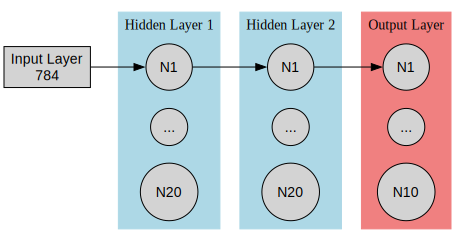

In [25]:
# Network visualizing can be either minimalistic...
nn.render()

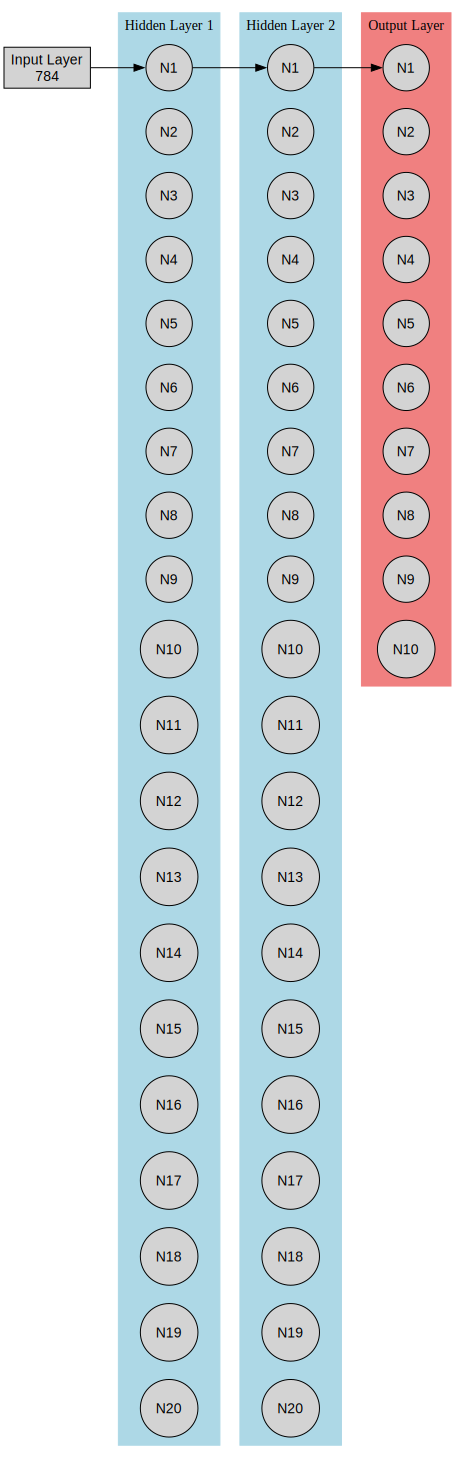

In [26]:
# ... or non-minimalistic.
nn.render(minimalistic=False)

### Training and Testing Our Network

Training our neural network involves specifying the number of epochs (iterations) and setting the learning rate, which are crucial parameters that influence the model's convergence and performance. 

Upon testing our neural network, visualizing the performance becomes essential. One effective method is plotting the confusion matrix. This visualization aids in understanding the model's accuracy across different classes, where elements along the diagonal represent correctly classified instances. 


(784, 35000) (35000,)
Iteration 0
Loss: -2.0011979205855495
Accuracy: 0.10074285714285715


Iteration 10
Loss: 10.823203914841134
Accuracy: 0.24574285714285715
Iteration 20
Loss: 6.0759811110325215
Accuracy: 0.37134285714285714
Iteration 30
Loss: 4.409007787874893
Accuracy: 0.4682857142857143
Iteration 40
Loss: 3.0384067270658854
Accuracy: 0.5666571428571429
Iteration 50
Loss: 2.6460540752497974
Accuracy: 0.6457428571428572
Iteration 60
Loss: 2.4847897791300455
Accuracy: 0.6961714285714286
Iteration 70
Loss: 2.3858472723694506
Accuracy: 0.7316571428571429
Iteration 80
Loss: 2.3285717338612546
Accuracy: 0.7578857142857143
Iteration 90
Loss: 2.3172426789346567
Accuracy: 0.7298571428571429
Iteration 100
Loss: 2.021650180910784
Accuracy: 0.7726
Iteration 110
Loss: 2.1293186197867713
Accuracy: 0.7937428571428572
Iteration 120
Loss: 2.0455232151343004
Accuracy: 0.7951142857142857
Iteration 130
Loss: 2.0865079040114765
Accuracy: 0.8095428571428571
Iteration 140
Loss: 2.1280779739602873
Accuracy: 0.8223428571428572
Iteration 150
Loss: 2.1017649649625185
Accuracy: 0.8275714285714286
I

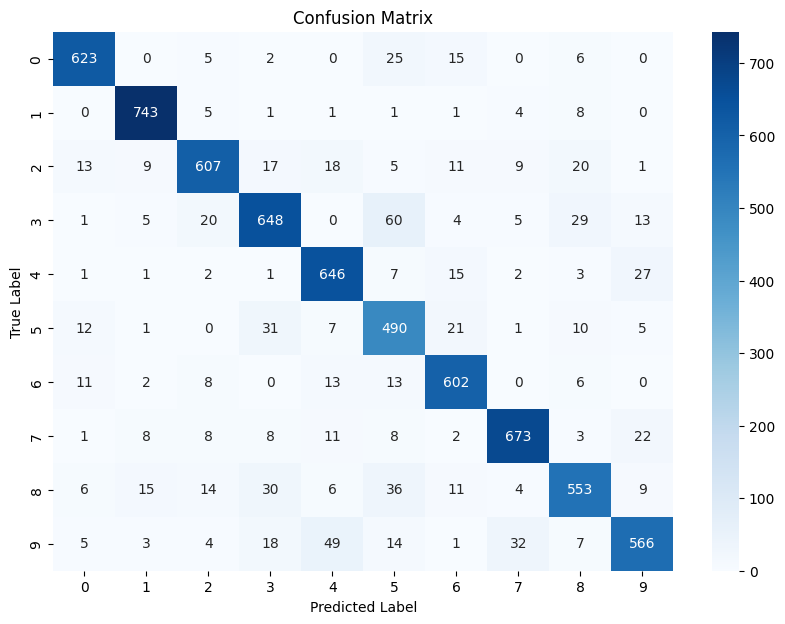

In [27]:
nn.train(X_train, y_train, iterations=300, learning_rate=0.005)
nn.test(X_test, y_test, plot=True)

## Dataset 2 - Heart Attack Risk Prediction
### Data loading and Preparation

In [28]:
# Load CSV
df_heart = pd.read_csv('./data/classification/HeartAttackPred/heart.csv')
print(df_heart.shape)
df_heart.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Perform one-hot encoding and normalize data
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

df_heart = pd.get_dummies(df_heart, columns=cat_cols, drop_first=True)

X = df_heart.drop(['output'],axis=1)
y = df_heart['output']

scaler = RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [30]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size = 0.2, random_state = 42)
X_train = X_train
X_test = X_test
print(X_train.shape, y_train.shape)
m, n = X_train.shape

(242, 22) (242,)


### Create a TiNNy network

In [31]:
l1 = tinny.DenseLayer(n, 64, "ReLU")
l2 = tinny.OutputLayer(64, 2, "softmax")
nn = tinny.TiNNyNetwork(problem_type="classification", loss_function="crossentropy", layers=[l1, l2])

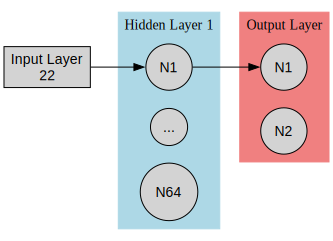

In [32]:
nn.render()

### Train and test

(22, 242) (242,)
Iteration 0
Loss: 20.409276960629036
Accuracy: 0.4214876033057851


Iteration 10
Loss: 17.840277063486923
Accuracy: 0.512396694214876
Iteration 20
Loss: 16.41305489840797
Accuracy: 0.5867768595041323
Iteration 30
Loss: 15.984888248884284
Accuracy: 0.6570247933884298
Iteration 40
Loss: 14.985832733329017
Accuracy: 0.6859504132231405
Iteration 50
Loss: 14.272221650789538
Accuracy: 0.6900826446280992
Iteration 60
Loss: 13.986777217773747
Accuracy: 0.6983471074380165
Iteration 70
Loss: 14.129499434281644
Accuracy: 0.7107438016528925
Iteration 80
Loss: 14.129499434281643
Accuracy: 0.7272727272727273
Iteration 90
Loss: 14.129499434281643
Accuracy: 0.7355371900826446
Iteration 100
Loss: 14.557666083805328
Accuracy: 0.7727272727272727
Iteration 110
Loss: 14.985832733329016
Accuracy: 0.7851239669421488
Iteration 120
Loss: 15.12855494983691
Accuracy: 0.78099173553719
Iteration 130
Loss: 15.12855494983691
Accuracy: 0.78099173553719
Iteration 140
Loss: 15.12855494983691
Accuracy: 0.7975206611570248
Iteration 150
Loss: 14.700388300313223
Accuracy: 0.818181818181818

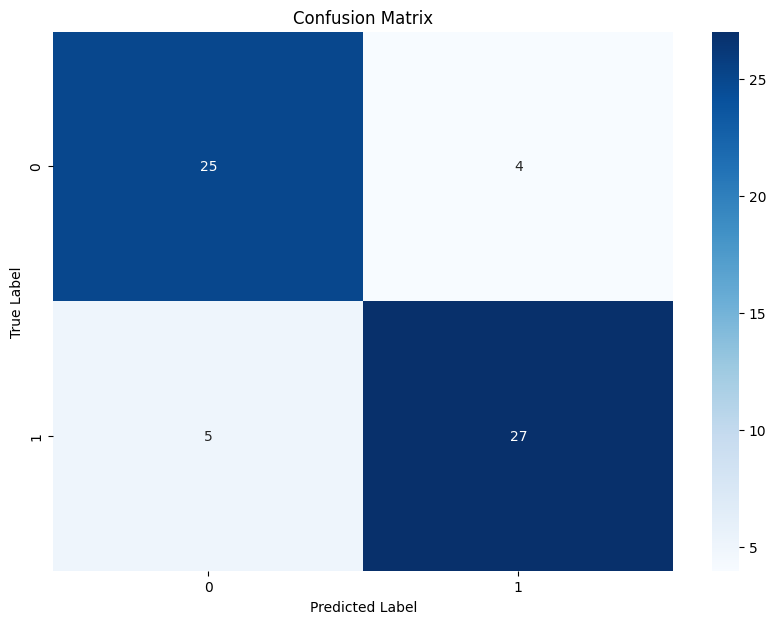

In [33]:
nn.train(X_train, y_train, iterations=500, learning_rate=0.001)
nn.test(X_test, y_test, plot=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a5c4f706-2695-450e-a31f-d187a004c4d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>